In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
data = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")



In [11]:
# Step 2: Check for data transformation needs
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 
                   'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']


In [12]:

# Check skewness of continuous variables
skewness = data[continuous_vars].skew()
print("Skewness of continuous variables:")
print(skewness)



Skewness of continuous variables:
Altitude                 1.001753
Actual_river_slope      10.318283
Elevation_mean_catch     0.848953
prec_ann_catch           0.058195
temp_ann                -0.476469
temp_jan                -0.287868
temp_jul                 0.287964
dtype: float64


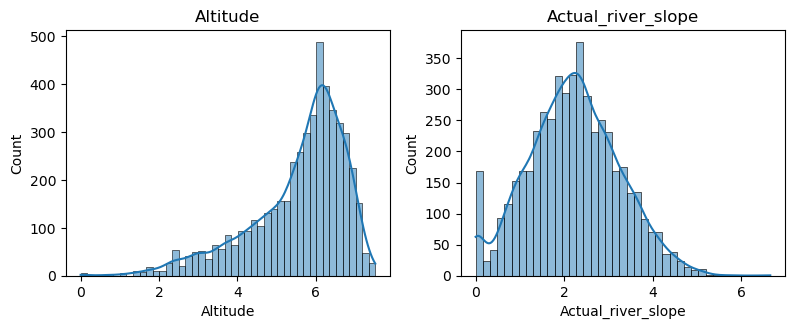

In [13]:
# Step 3: Apply appropriate data transformation
# In this case, we'll use log transformation for variables with skewness greater than 1
skewed_vars = skewness[abs(skewness) > 1].index
data[skewed_vars] = np.log1p(data[skewed_vars])

# Visualize new distributions
plt.figure(figsize=(12, 6))
for i, var in enumerate(skewed_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[var], kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()



In [14]:
# Step 4: Calculate species richness
data['Species_Richness'] = data.iloc[:, 1:].count(axis=1)

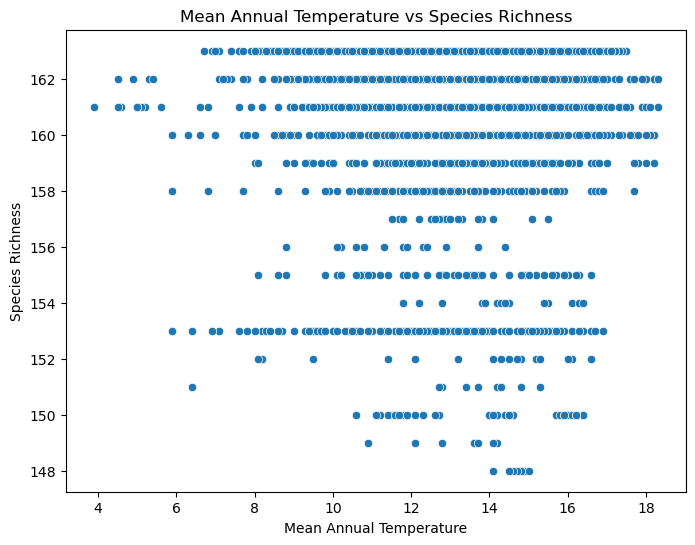

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [15]:
# Step 5: Check for bivariate outliers
# Plotting the relationship between Mean Annual Temperature and Species Richness
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp_ann', y='Species_Richness', data=data)
plt.title('Mean Annual Temperature vs Species Richness')
plt.xlabel('Mean Annual Temperature')
plt.ylabel('Species Richness')
plt.show()

# Running bivariate Isolation Forest
X = data[['temp_ann', 'Species_Richness']]
bif = IsolationForest(contamination=0.05, random_state=42)
data['Outlier'] = bif.fit_predict(X)

# Plotting the result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp_ann', y='Species_Richness', hue='Outlier', data=data, palette='Set1')
plt.title('Outliers Detection: Mean Annual Temperature vs Species Richness')
plt.xlabel('Mean Annual Temperature')
plt.ylabel('Species Richness')
plt.legend(title='Outlier', loc='upper right')
plt.show()